In [10]:
import glob

import pandas as pd
import numpy as np
import scanpy as sc
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pathlib
import celltypist
from celltypist import models
params = {
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 10,
    'font.family': "Arial",
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 100
   }

mpl.rcParams.update(params)

sns.set_style("ticks")
sns.set_context(context='paper')
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0, "transparent": True}
mpl.rc('savefig', dpi=300)
output_dir='../../figures/QCandAnnotation'
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg"]
sc.settings.figdir = output_dir
sc.set_figure_params(format='pdf', transparent=True,)
def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 100)
%load_ext autoreload
%autoreload 2


def recluster(adata, batch_correct, sample_uid = 'sample_uid'):
    sc.pp.pca(adata)
    if batch_correct == True:
        sc.external.pp.bbknn(adata, batch_key=sample_uid)
    else:
        sc.pp.neighbors(adata, n_neighbors=10)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color = sample_uid)
    return adata

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def cluster(adata, batch_correct=False, batch_key="tissue"
):
    print("PCA-ing")
    sc.pp.pca(adata)
    print("drawing neighbor graph")
    if batch_correct == True:
        print("batch corrected neighbors")
        sce.pp.bbknn(adata, batch_key=batch_key)
    else:
        sc.pp.neighbors(adata, n_neighbors=20)
    print("UMAP-ing")
    sc.tl.umap(adata)
    print("leiden-ing")
    sc.tl.leiden(adata, resolution=0.3, key_added="global_leiden")
                 
    return adata

In [12]:
def plot_umaps(adata, colors, folder, subset):
    for color in colors:
        sc.pl.umap(adata, color=color, frameon=True,
          title="{}".format(color), add_outline=True, legend_fontoutline=4, legend_fontsize='x-small', save="{}_{}_{}".format(tissue, subset, color))
    return adata

In [13]:
umap_vars = ['sample_uid', 'donor', 'predicted_labels', 'global_leiden']

## Load the Data

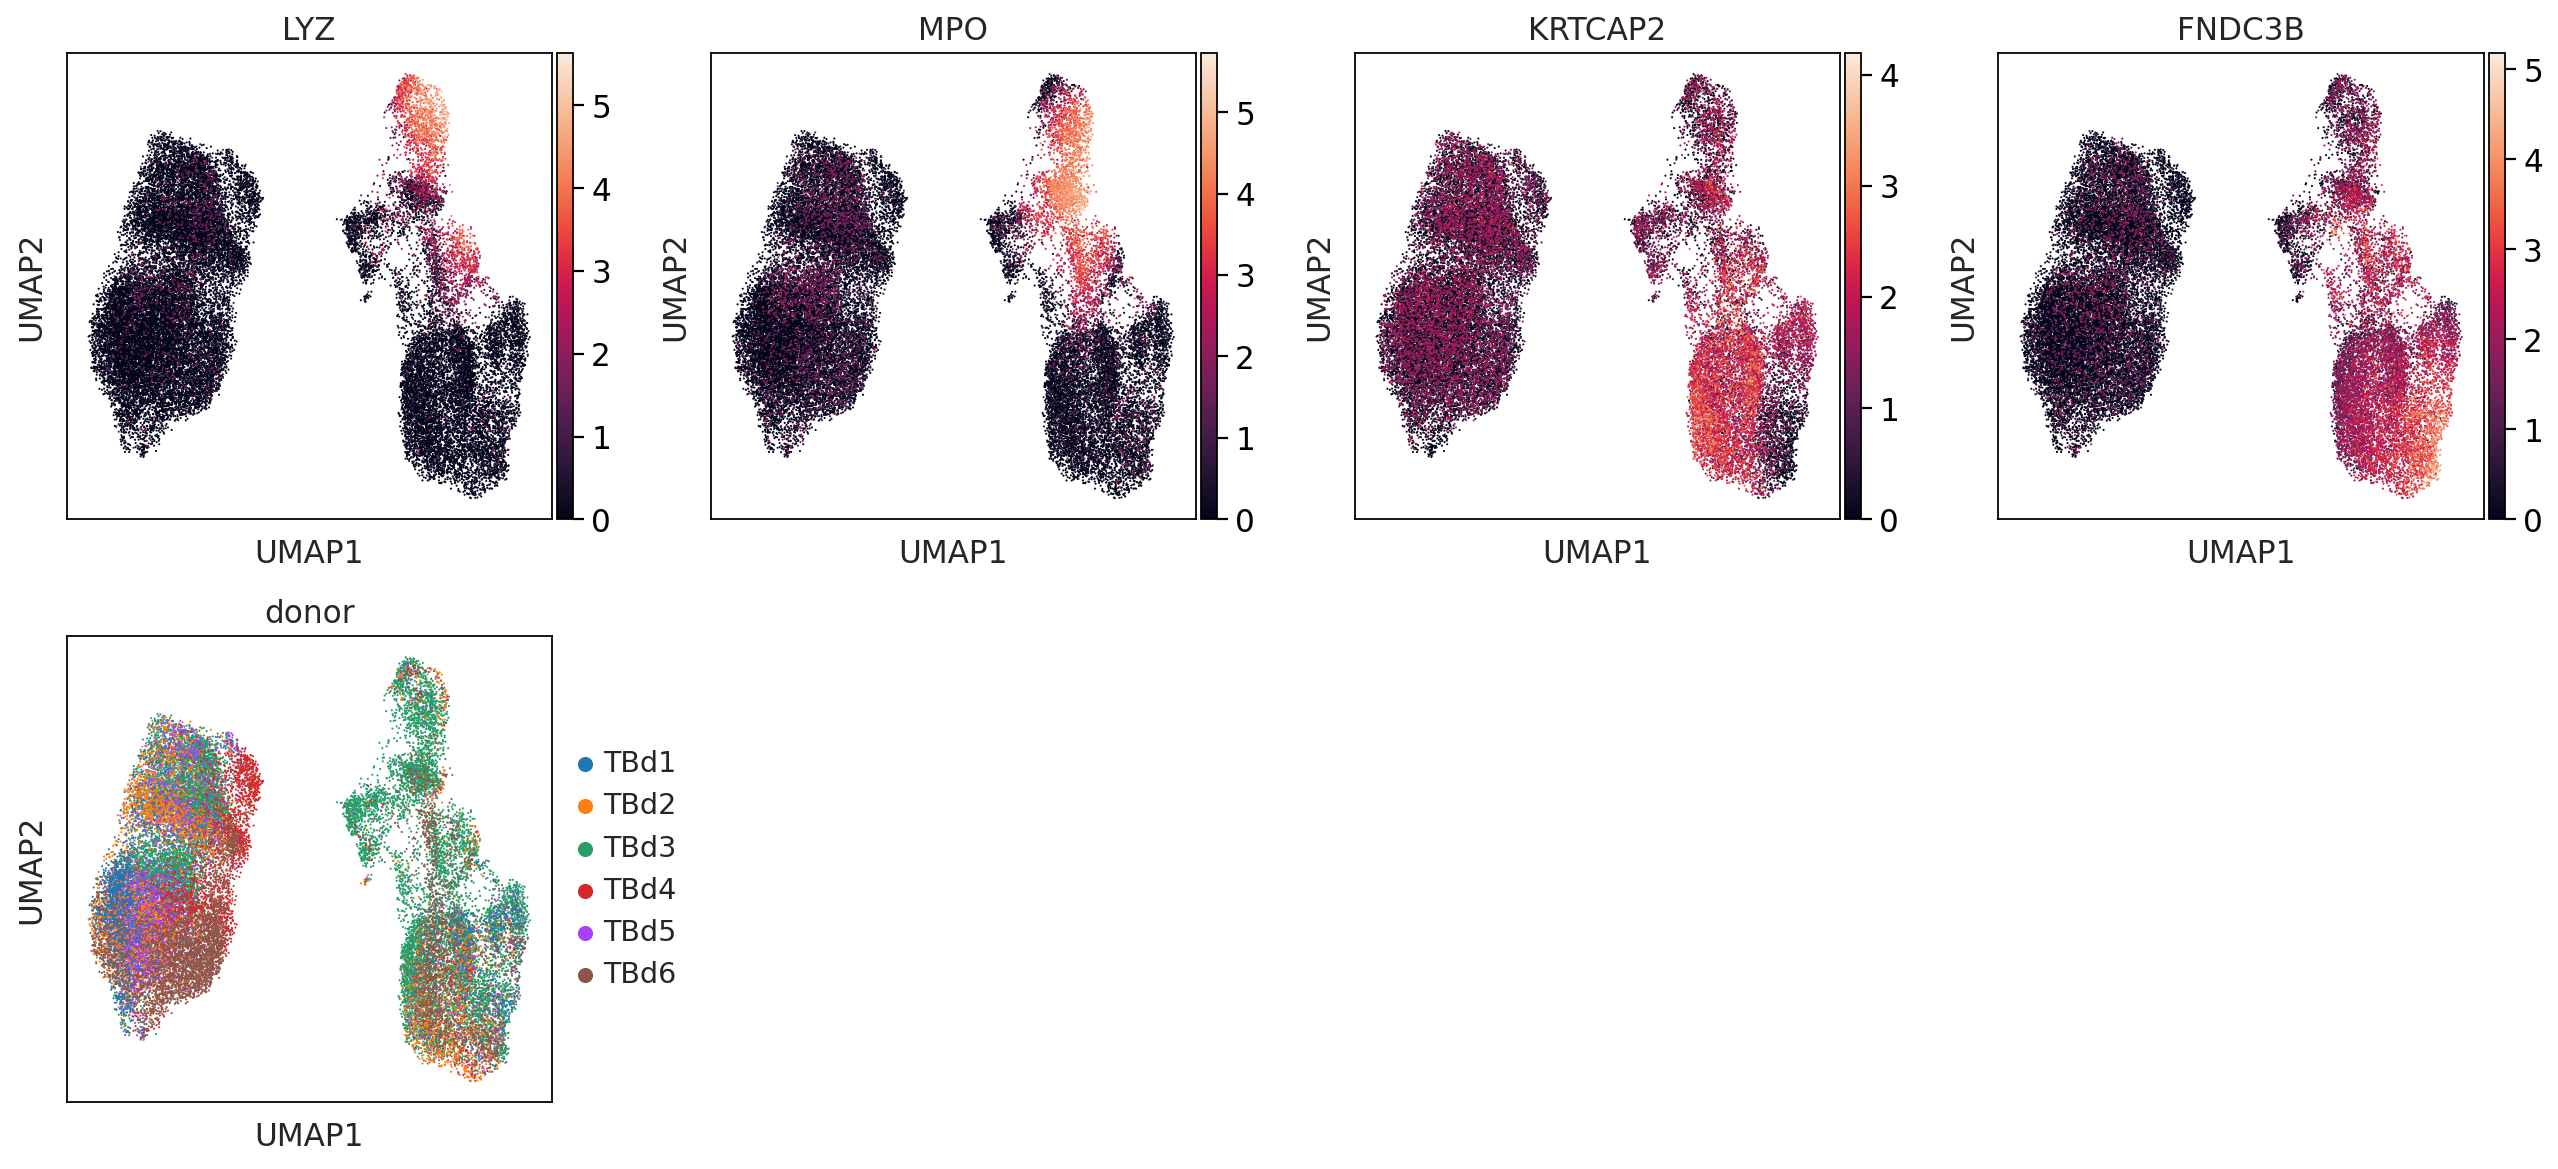

In [23]:
sc.pl.umap(bcells_filtered, color = ['LYZ', 'MPO', "KRTCAP2", "FNDC3B", 'donor'])

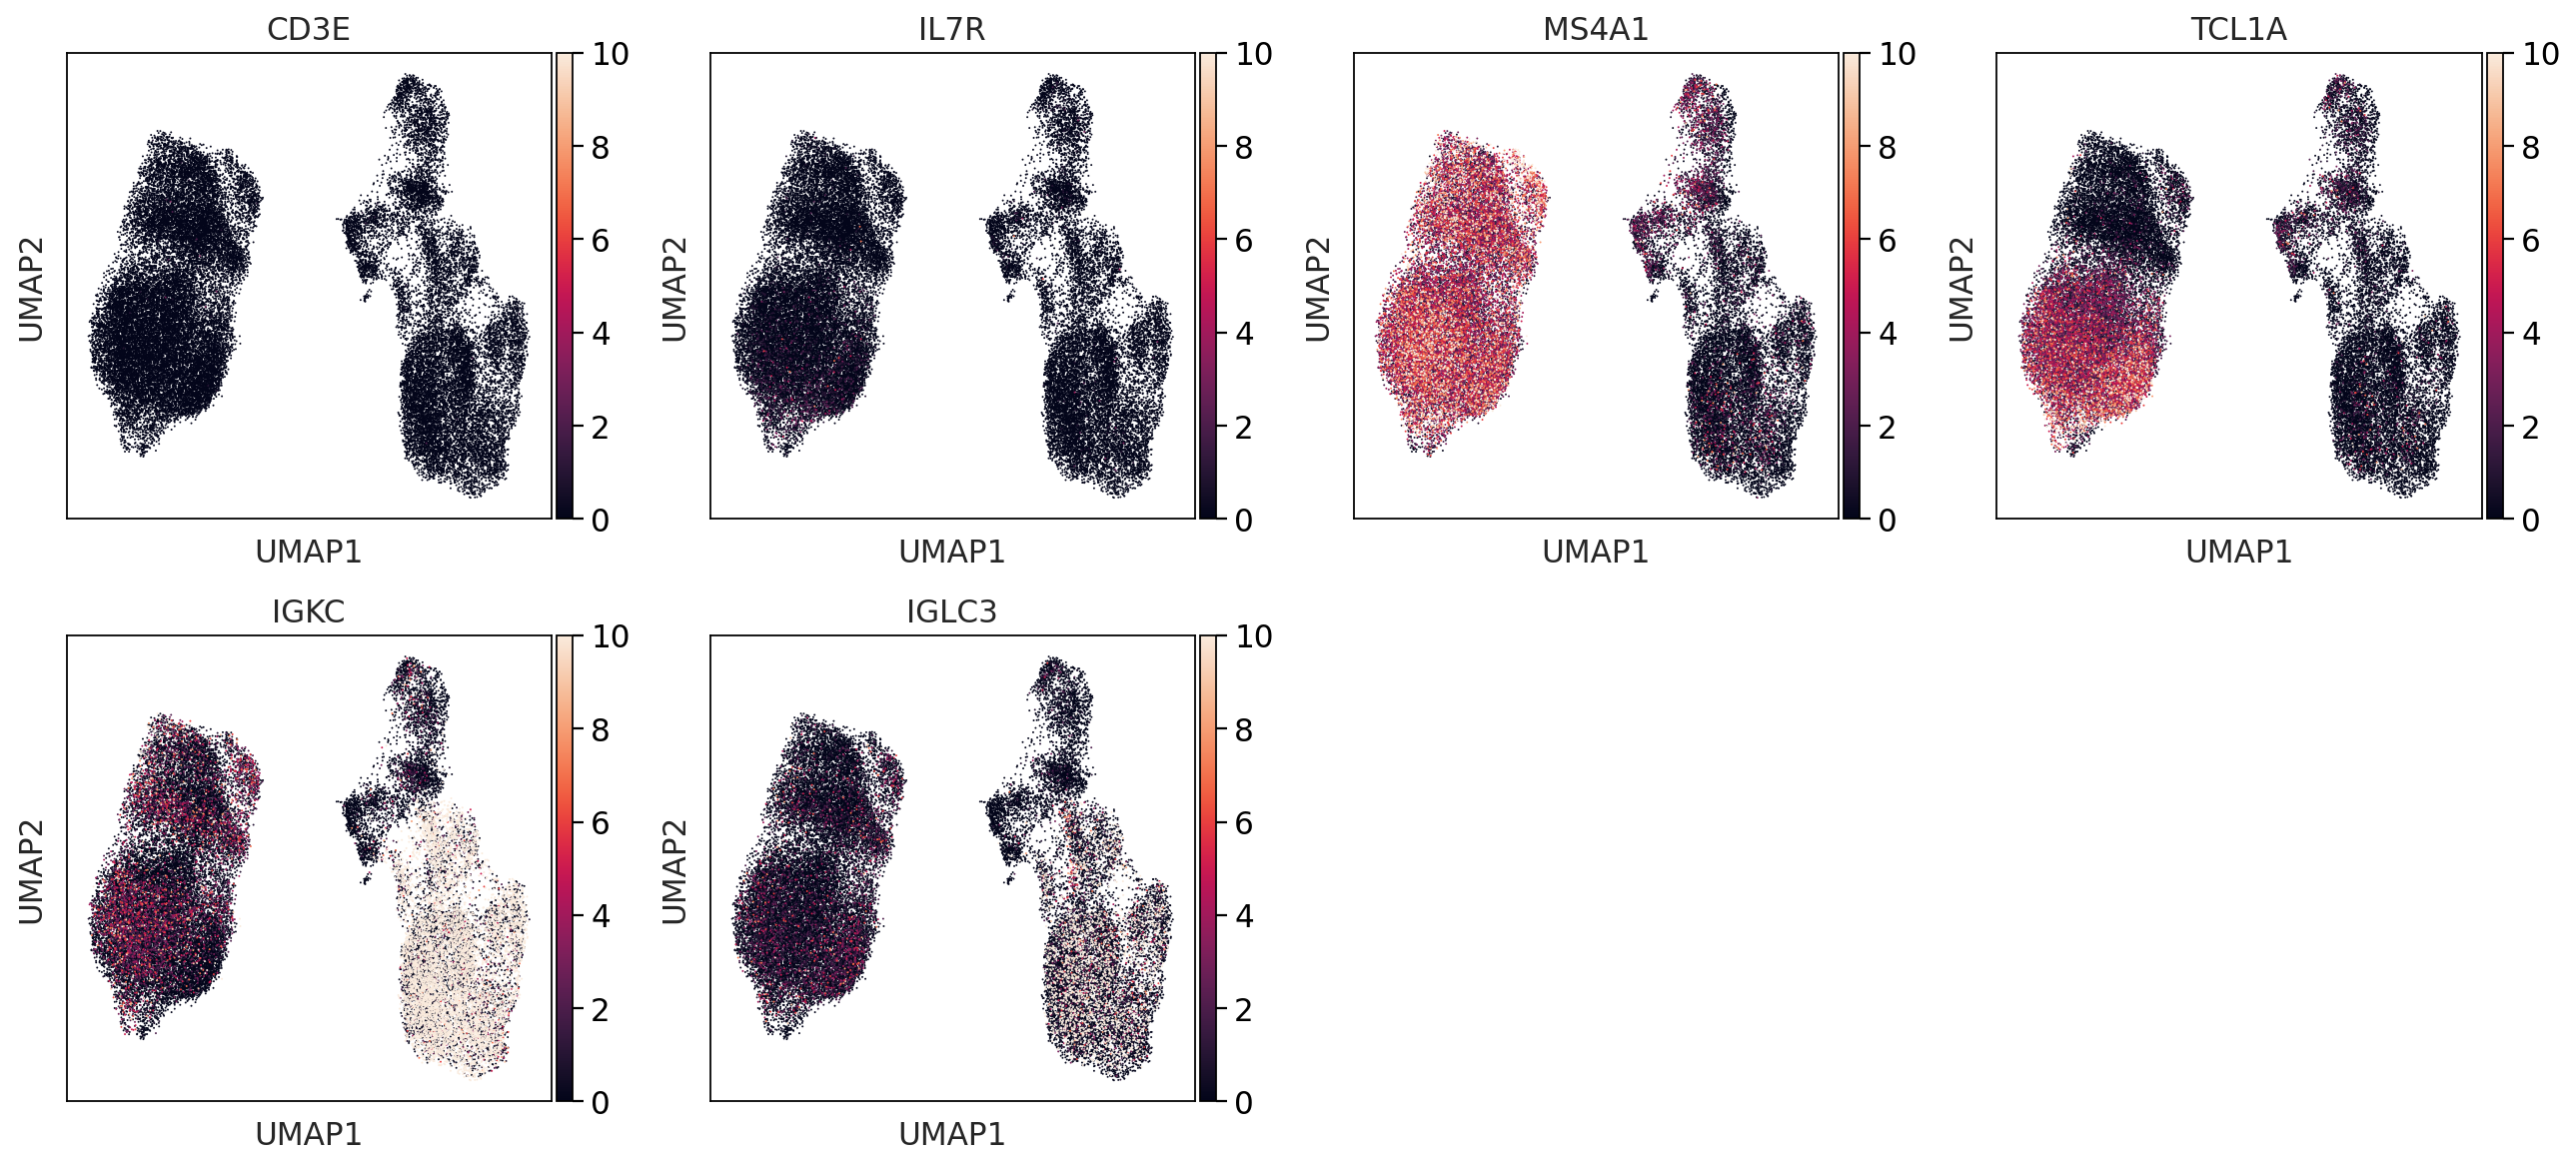

In [24]:
sc.pl.umap(bcells, color=['CD3E', 'IL7R', 'MS4A1', 'TCL1A', 'IGKC', "IGLC3"], layer='background_removed', vmax = 10)

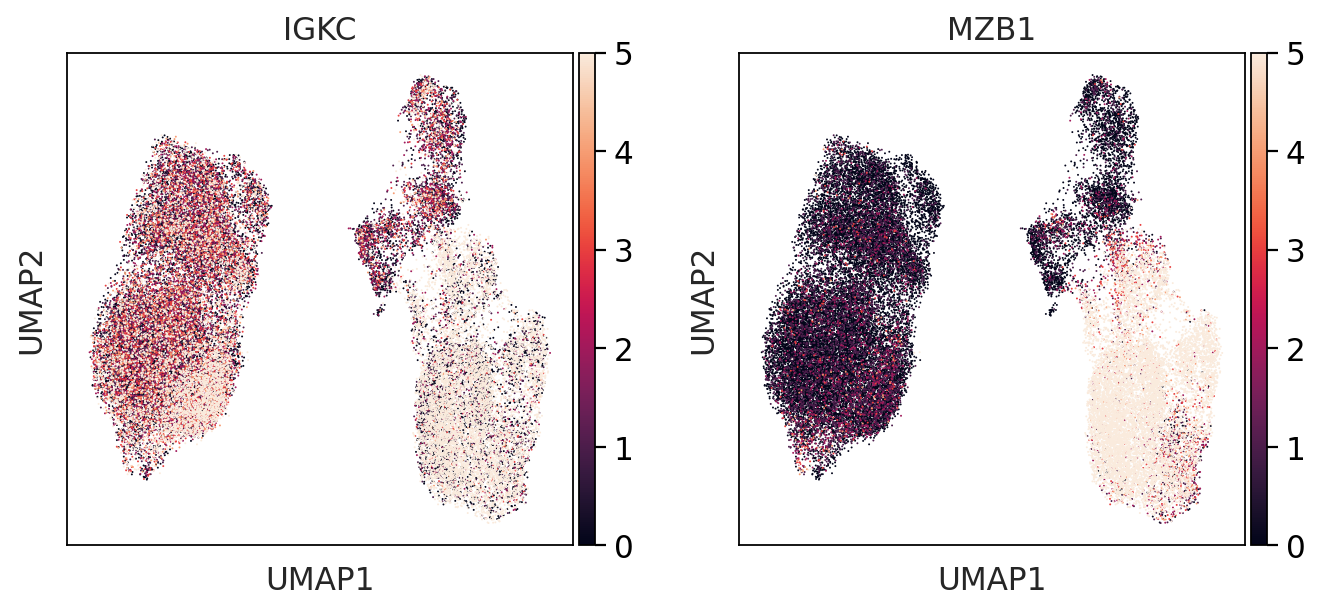

In [25]:
sc.pl.umap(bcells, color = ['IGKC', 'MZB1'], layer = 'umi_counts', vmax = 5)

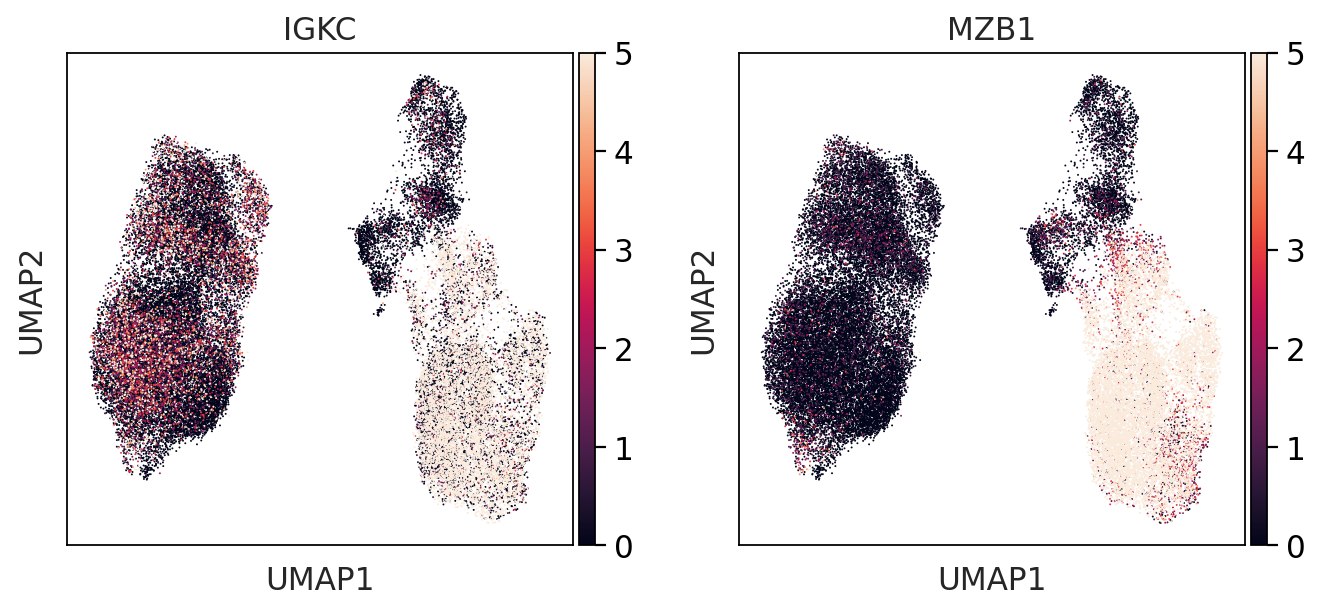

In [26]:
sc.pl.umap(bcells, color = ['IGKC', 'MZB1'], layer = 'background_removed', vmax = 5)